In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.callbacks import *

In [3]:
torch.cuda.is_available()

True

In [4]:
tfms = get_transforms(do_flip=True,flip_vert=False,max_rotate=10.0,max_zoom=1.1,max_lighting=0.2,max_warp=0.2,p_affine=0.75,p_lighting=0.75)


In [5]:
src = (ImageList.from_folder(path='train').split_by_rand_pct(0.2).label_from_folder())

In [6]:
src

LabelLists;

Train: LabelList (65934 items)
x: ImageList
Image (3, 375, 500),Image (3, 352, 500),Image (3, 800, 440),Image (3, 500, 375),Image (3, 600, 800)
y: CategoryList
class-857,class-857,class-857,class-857,class-857
Path: train;

Valid: LabelList (16483 items)
x: ImageList
Image (3, 1500, 2000),Image (3, 373, 500),Image (3, 600, 800),Image (3, 357, 500),Image (3, 1500, 2000)
y: CategoryList
class-508,class-540,class-204,class-362,class-362
Path: train;

Test: None

In [7]:
data = src.transform(tfms,size=512).databunch(bs=32).normalize(imagenet_stats)

In [8]:
data.c

45

In [9]:
learn = cnn_learner(data, models.densenet121, metrics=[error_rate, accuracy, FBeta(beta=1,average='macro')])

/home/ubuntu/anaconda3/envs/snakes_breed/lib/python3.6/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


In [10]:
learn.load('densenet121-512-slice-2')

Learner(data=ImageDataBunch;

Train: LabelList (65934 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
class-857,class-857,class-857,class-857,class-857
Path: train;

Valid: LabelList (16483 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
class-508,class-540,class-204,class-362,class-362
Path: train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tra

In [11]:
data = src.transform(tfms,size=768).databunch(bs=8).normalize(imagenet_stats)

In [12]:
learn.data= data

In [13]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (65934 items)
x: ImageList
Image (3, 768, 768),Image (3, 768, 768),Image (3, 768, 768),Image (3, 768, 768),Image (3, 768, 768)
y: CategoryList
class-857,class-857,class-857,class-857,class-857
Path: train;

Valid: LabelList (16483 items)
x: ImageList
Image (3, 768, 768),Image (3, 768, 768),Image (3, 768, 768),Image (3, 768, 768),Image (3, 768, 768)
y: CategoryList
class-508,class-540,class-204,class-362,class-362
Path: train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tra

In [14]:
learn = learn.to_fp16()

In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


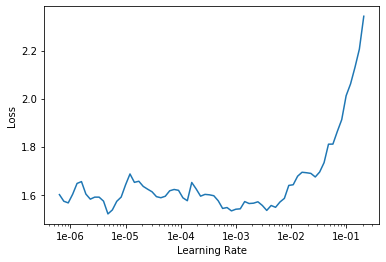

In [16]:
learn.recorder.plot()

In [17]:
lr=1e-3

In [18]:
learn.fit_one_cycle(5,slice(1e-6,lr/10))

epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,1.520698,1.025470,0.292726,0.707274,0.643669,35:03


KeyboardInterrupt: 

In [ ]:
learn.save('densenet121-768-slice-5')

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2,slice(1e-6,1e-3))

In [ ]:
learn.save('densenet121-512-slice-2')

In [ ]:
2+2